# Business Objective:

## The Fundamental goal here is to model the CO2 emisson as funcation of several car engine features

## Data Set Details: The file contains the data for this example Here the number of variables (columns) is 12, & the number of instance (rows) is  7385

#### Importing Libriaries

In [141]:
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_colwidth',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')

##### Load Dataset

In [142]:
df= pd.read_csv('co2_emissions (1).csv')
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


### EDA

#### Summary if the dataset

In [143]:
df.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Getting basic info of the dataset

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

#### Check for NULL values

In [145]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

•There are no Null Values in the Dataset , missing value imputation is not required``

In [146]:
df.shape

(7385, 12)

In [147]:
transmission_type ={'A:Automatic','AM:Automated manual','AS:Auto(select shift)','AV:Continuously variable', 'M:Manual'}
fuel_type={"X" : 'Regular gasoline', "Z" : 'Premium gasoline', "D" : 'Diesel', "E" : 'Ethanol (E85)', "N" : 'Natural gas'}

In [148]:
df['fuel_type']=df['fuel_type'].replace(fuel_type)
df['transmission']=df['transmission'].replace(transmission_type)

In [149]:
df.head(7)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Premium gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Premium gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Premium gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Premium gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Premium gasoline,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Premium gasoline,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Premium gasoline,11.8,8.1,10.1,28,232


In [150]:
df.describe(include=object)

,make,model,vehicle_class,transmission,fuel_type
count,7385,7385,7385,7385,7385
unique,42,2053,16,5,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS,Regular gasoline
freq,628,32,1217,3127,3637


### We can observe that

•The dataset has 7385 Rows and 12 Coloumns

•The 4 Columns are of type 'Float'

•The 3 Columns are of type 'Int'

•The 5 Columns are of type 'Object'(Categorical)'

•The average Co2 emissions across the dataset is 250.59 gm/Km

•The Fuel consumption is found to be greater in city than highway

•There are 42 different makers in the dataset , out of which Ford has the highest number of entries

•There are 2053 different models in the dataset , out of which F-150 FFV 4X4 has highest entries

•There are 16 different vehicle classes in the dataset , out of which SUV-SMALL has highest entries

•There are 5 different transmission type in the dataset , out of which Auto(Select Shift) has highest entries

•There are 5 different Fuel types in the dataset , out of which most of the cares run on Regular gasoline


In [151]:
duplicate =co.duplicated().sum()

In [152]:
print('The no of duplicate in this dataset are {}'.format(duplicate))

The no of duplicate in this dataset are 1217


### Dropping Duplicates using drop_duplicates


In [153]:
df.drop_duplicates(inplace=True)

In [154]:
df.shape

(6273, 12)

In [155]:
df.reset_index(inplace=True)

In [156]:
df.drop(['index'],inplace=True,axis=1)

### Seperating Numerical & Categorical Columns

In [157]:
categorical_col=[]
numberical_col=[]
for i in co.columns:
    if co[i].dtype=='object':
        categorical_col.append(i)
    else:
        numberical_col.append(i)

In [158]:
categorical_col

['transmission', 'fuel_type', 'Vehicle_Class_Type', 'make1']

In [159]:
numberical_col

['engine_size',
 'cylinders',
 'fuel_consumption_city',
 'fuel_consumption_hwy',
 'fuel_consumption_comb(l/100km)',
 'fuel_consumption_comb(mpg)',
 'co2_emissions']

## Visualization

#### Univariate Analysis

Skewness-> 0.8109634973059867
Kurtosis-> -0.15317073013177973


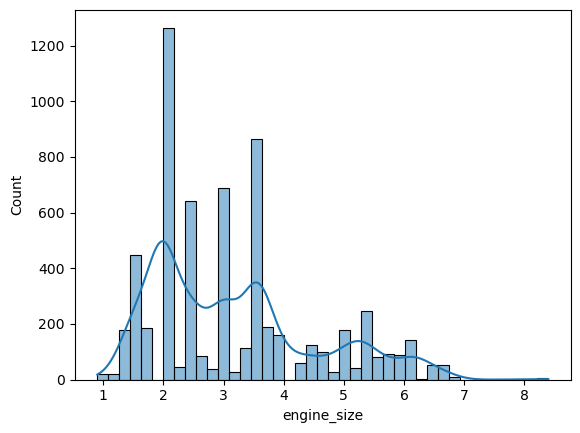

Skewness-> 1.106650710778432
Kurtosis-> 1.4350759501372607


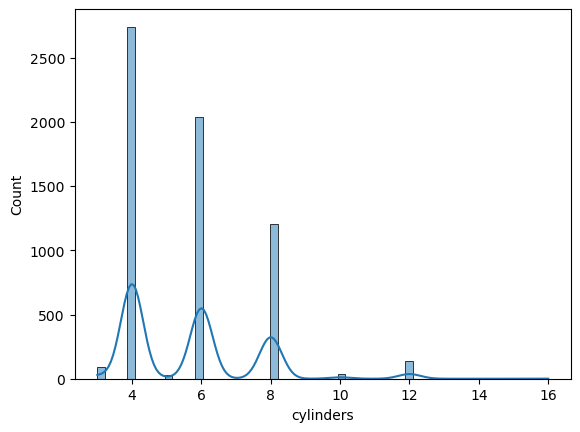

Skewness-> 0.841856275830459
Kurtosis-> 1.204763947078427


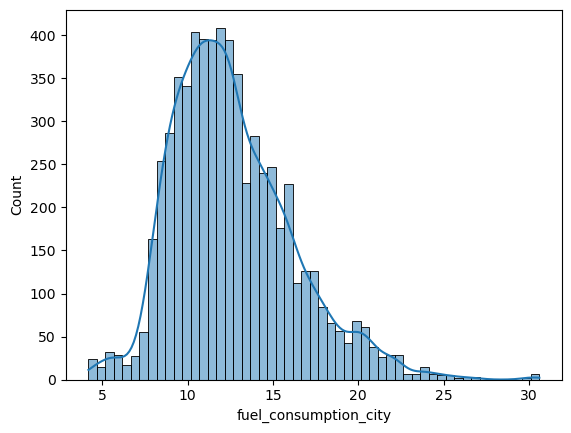

Skewness-> 1.110217266974703
Kurtosis-> 2.0054631690048454


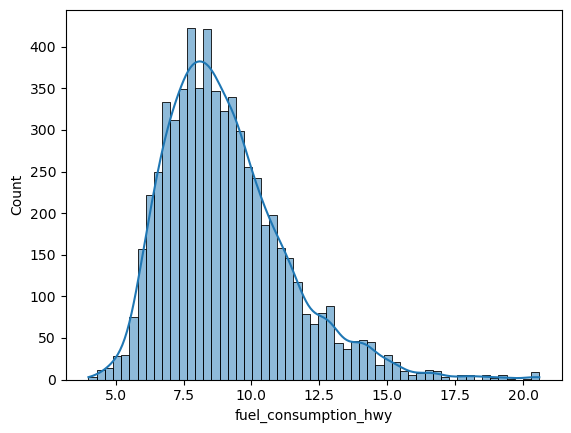

Skewness-> 0.9264095868150038
Kurtosis-> 1.4013798310237942


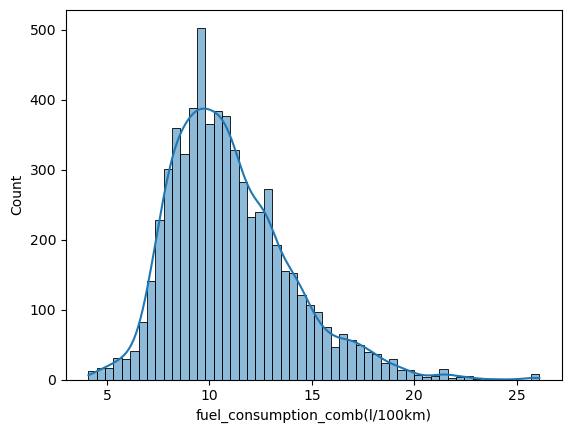

Skewness-> 0.9152769010295129
Kurtosis-> 2.2885420634399143


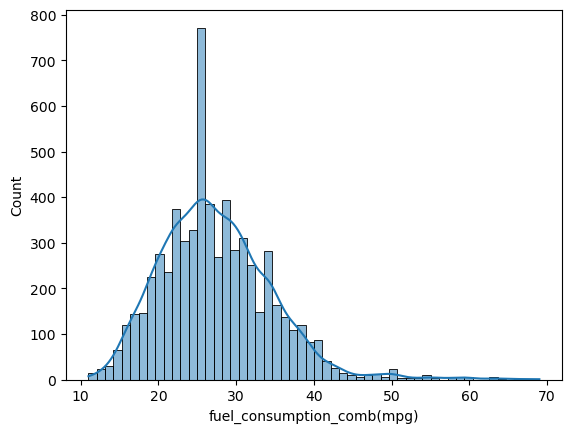

Skewness-> 0.5588650833129282
Kurtosis-> 0.44397799715675124


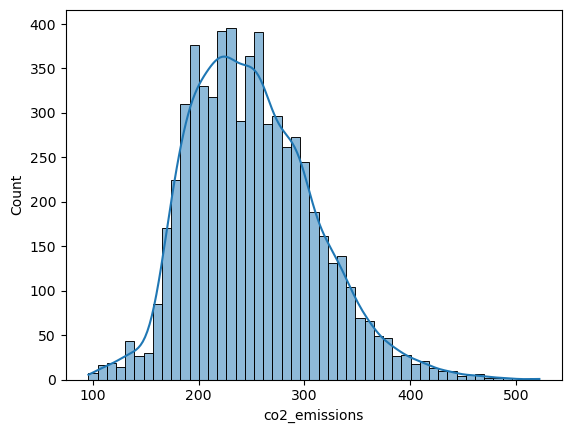

In [160]:
for i in numberical_col:
    sns.histplot(df[i],kde=True)
    print('Skewness->',df[i].skew())
    print('Kurtosis->',df[i].kurt())
    plt.show()

•'fuel_consumption_city', 'fuel_consumption_hwy','fuel_consumption_comb(l/100km)', 
'fuel_consumption_comb(mpg)', 'co2_emissions are Somewhat normally distributed with some Skewness

•'engine_size','cylinders' are not normally distributed

### Categorical Col Visualization

In [161]:
for i in categorical_col:
    print("Unique Values",co[i].value_counts().index)
    print("Counts",co[i].value_counts().values)
    print("***************************************")

Unique Values Index(['AS', 'A', 'M', 'AM', 'AV'], dtype='object')
Counts [2592 1359 1000  465  393]
***************************************
Unique Values Index(['Regular gasoline', 'Premium gasoline', 'Ethanol (E85)', 'Diesel',
       'Natural gas'],
      dtype='object')
Counts [2908 2530  223  147    1]
***************************************
Unique Values Index(['sedan', 'hatchback', 'suv', 'truck'], dtype='object')
Counts [1893 1645 1615  656]
***************************************
Unique Values Index(['General', 'Premium', 'Sports', 'Luxury'], dtype='object')
Counts [2606 2568  485  150]
***************************************


In [162]:
categorical_col

['transmission', 'fuel_type', 'Vehicle_Class_Type', 'make1']

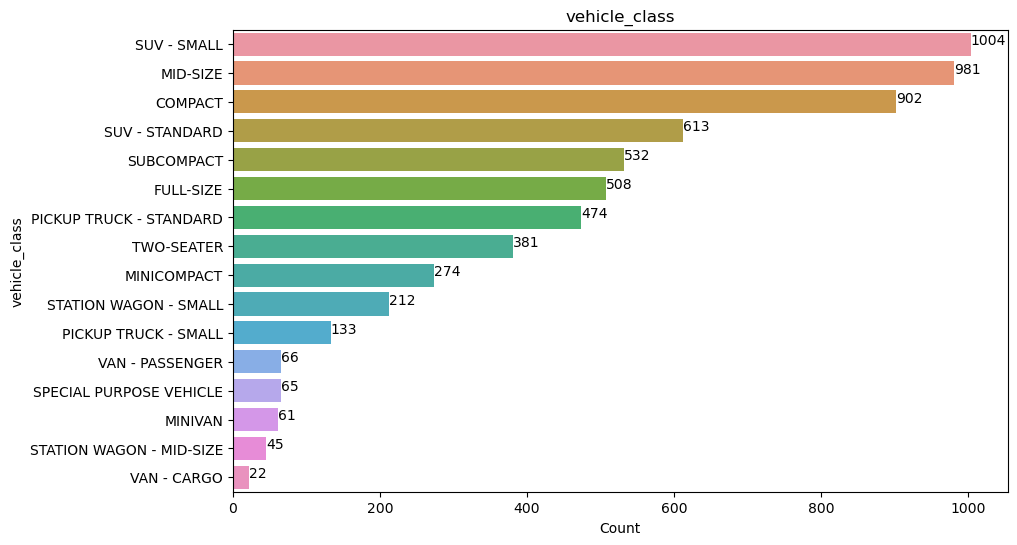

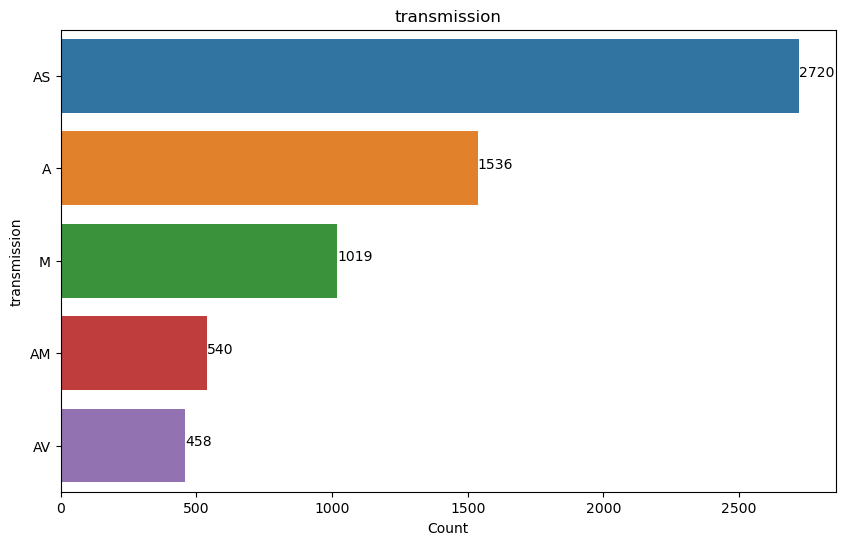

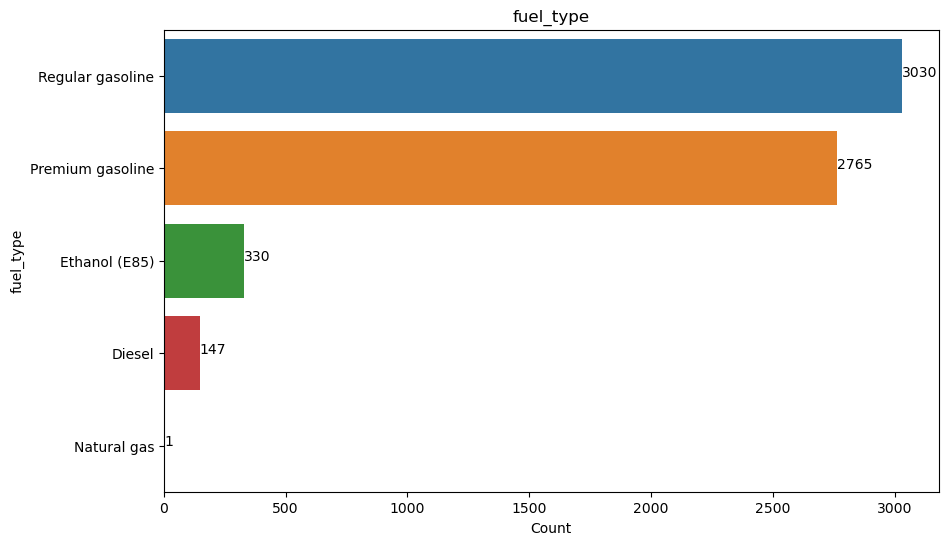

In [163]:
for i in['vehicle_class','transmission', 'fuel_type']:
    plt.figure(figsize=(10,6))
    x=df[i].value_counts().index
    y=df[i].value_counts().values
    ax=sns.barplot(y=x,x=y)
    for j,v in enumerate(df[i].value_counts().values):
        ax.text(v,j,v)
    ax.set_xlabel('Count')
    ax.set_ylabel(i)
    plt.title(i)
    plt.show()

•There are 16 different vehicle classes in the dataset , out of which SUV-SMALL has highest entries(959)

•There are 5 different transmission type in the dataset , most of the cars are Automatic(Select Shift) type (2633)

•There are 5 different Fuel types in the dataset , out of which most of the cars run on Regular gasoline(2869)

In [164]:
grouped_dt =co.groupby(['make','vehicle_class'])

KeyError: 'make'

In [ ]:
make_list=[]
vehicle_list=[]
count_list=[]
for x,y in grouped_dt:
    make_list.append(x[0])
    vehicle_list.append(x[1])
    count_list.append(y.aggregate(np.size)['make'])

In [ ]:
grp_count=pd.DataFrame({'make':make_list,'vehicle':vehicle_list,'count':count_list})
grp_count

In [ ]:
grp_count.nunique()

•While plotting the count for each vehicle class across each maker , we found out that SRT,Bugati and SMART makers have only one vehicle class type with less than 10 entries

•While Chervolet makers have different variants in the vehicle type with 13 types

•The distribution across few makers like are not evenly distributed "Jeep","RAM" and "Porchse"

In [ ]:
for i in numberical_col:
    sns.scatterplot(x=df[i],y=df['co2_emissions'])
    plt.show()

In [ ]:
plt.figure(figsize=(20,5))
co
co.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='g')

plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)

In [ ]:
sns.pairplot(df)

In [ ]:
#Co2 has linear relationship with engine size and fuel consumption
#As engine size increases fuel consupmtion increases and no of cylnders increases,co2 emission increases
#Fuel consumption comb has perfect correlation with fuel consumption highway and fuel consumption city
#Fuel type Ethanol is more in co2 emission and the same fuel type is mostly used in city and highway hence co2 emission would be more
##As cylnders size increases Co2 emission increases
#Co2 emission is more for fuel type Ethanol
#Fuel consumption comb has inverse inverse relationship with co2 emission
#Co2 emission is generally increasing with increase in remaining features except fuel consumption comb

In [ ]:
sns.heatmap(df.corr(),annot=True)

•co2_emission has high positive correlation with fuel_consumption_comb(0.92) and fuel_consumption_city(0.92)

•fuel consumption highway and city are also strongly correlated

In [ ]:
print('Overall Average Co2_Emission(gm/kg)'
      ,df['co2_emissions'].mean())

### Categorical Data V/S Target Variable

In [ ]:
for i in categorical_col:
    plt.figure(figsize=(10,7))
    gruoped_dt= co.groupby(i)
    make_list=[]
    count_list=[]
    for x,y in gruoped_dt:
        make_list.append(x)
        count_list.append(np.round(y.aggregate(np.mean)['co2_emissions'],2))
        grp_count=pd.DataFrame({i:make_list,'Average Emissions(gm/kg)':count_list})
        grp_count=grp_count.sort_values(by='Average Emissions(gm/kg)',ascending=False).reset_index(drop=True)
    ax=sns.barplot(x='Average Emissions(gm/kg)',y=i,data=grp_count.head(10))
    for j,v in enumerate(grp_count['Average Emissions(gm/kg)'].head(10).values):
        ax.text(v,j,v)
    ax.set_xlabel('Average Emissions(gm/kg)')
    ax.set_ylabel(i)
    plt.title(i)
    plt.show()

→ From the above categorical plots ,we see bugatti being highest average co2_emissions among makers

→we see Chiron beign highes average co2_emission among Model

→we see Van- Passenger has highest average co2_emission among vehicle class, i.e. begger the vehicle,higher the co2_emissions

→we see automatic transformation types has the highest average co2_emission among all types

→cars using Ethonal has highest co2_emissions

→we see that only one car used Natural gas in the whole dataset

→co2_emission is positively Skewed, which implies thst the co2_emission are lower than the average emission rate

## Bivariate analysis Variation of input Feature V/S Target Variable

In [ ]:
df['Vehicle_Class_Type'] = df['vehicle_class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'],
                                                      'hatchback')

In [ ]:
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
                                                         'STATION WAGON - MID-SIZE'],
                                                         'sedan')

In [ ]:
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],
                                                         'suv')

In [ ]:
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
                                                         'PICKUP TRUCK - SMALL'],
                                                         'truck')

In [ ]:
df['Vehicle_Class_Type'].unique()

In [ ]:
df=df.drop(['vehicle_class'],axis=1)

In [ ]:
co.groupby('Vehicle_Class_Type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='g')
plt.title('Fuel type wrt CO2 Emission',fontsize=24)
plt.xlabel('Vehicle_Class_Type',fontsize=21)
plt.ylabel('co2 Emission',fontsize=21)
plt.figure(figsize=(21,6))

## →Trucks are more in Co2 Emissions

In [ ]:
df['make'].nunique()

In [ ]:
df['make1'] = df['make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI',
                                                       'JAGUAR','SRT'],
                                                      'Sports')

In [ ]:
df['make1']=df['make1'].replace(['ALFA ROMEO','AUDI','BMW',
                                 'BUICK','CADILLAC','CHRYSLER','DODGE','GMC','INFINITI','JEEP','LAND ROVER',
                                 'LEXUS','MERCEDES-BENZ','MINI','SMART','VOLVO'],
                               'Premium')

In [ ]:
df['make1'] = df['make1'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',
                                                         'GENESIS'],
                                                         'Luxury')

In [ ]:
df['make1'] = df['make1'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA',
                                                         'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI',
                                                         'NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA',
                                                         'VOLKSWAGEN'],
                                                         'General')

In [ ]:
df['make1'].unique()

In [ ]:
df['make1'].value_counts()

In [ ]:
df=df.drop(['make'],axis=1)

In [ ]:
df.head()

In [ ]:
for i in numberical_col:
    sns.boxplot(data=df,x=i,y='fuel_type')
    plt.show()

In [ ]:
dt_numberical= df.select_dtypes(include=np.number)

In [ ]:
Q1=dt_numberical.quantile(0.25)
Q3=dt_numberical.quantile(0.75)
IQR=Q3-Q1

In [ ]:
outlier= pd.DataFrame((dt_numberical<(Q1-1.5*IQR))|(dt_numberical>(Q3+1.5*IQR)))

In [ ]:
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [ ]:
df.shape

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(['index'],inplace=True,axis=1)

In [165]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Premium gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Premium gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Premium gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Premium gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Premium gasoline,12.1,8.7,10.6,27,244


In [166]:
df.head(1)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Premium gasoline,9.9,6.7,8.5,33,196


In [167]:
# Handle missing values if any
df = df.dropna()


In [169]:
# Convert categorical variables to numerical format if necessary
df = pd.get_dummies(df, columns=['make', 'model', 'vehicle_class', 'transmission', 'fuel_type'])


In [170]:
# Define feature variables (X) and target variable (y)
X = df.drop(columns=['co2_emissions'])
y = df['co2_emissions']

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [172]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.000667017619147e+18
R-squared: -1674070966113075.2
